#### Clustering, Optimizing and Assessing

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

In [4]:
import matplotlib.pyplot as plt

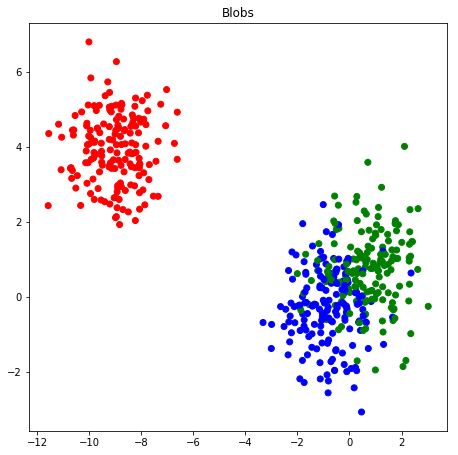

In [7]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r', 'g', 'b'])
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.set_title("Blobs")
plt.show()

In [8]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)

kmean.fit(blobs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
kmean.cluster_centers_ 

array([[-9.01168275,  3.93798995],
       [-0.97727698, -0.36987495],
       [ 0.87596948,  0.83860861]])

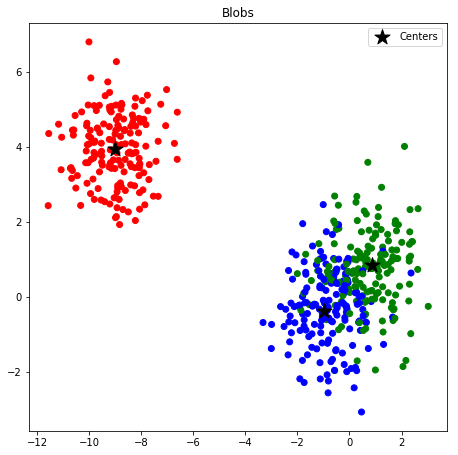

In [11]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:, 0],kmean.cluster_centers_[:, 1], marker='*', s=250,color='black', label='Centers')
ax.set_title("Blobs")
ax.legend(loc='best')
plt.show()

In [12]:
kmean.labels_[:5]

array([0, 0, 1, 2, 2])

In [13]:
classes[:5]

array([0, 0, 2, 2, 1])

In [14]:
kmean.transform(blobs)[:5]

array([[  0.64249342,   9.35455222,  10.70418565],
       [  0.29086274,   9.03138043,  10.33020121],
       [  8.18708402,   1.00565217,   3.05137946],
       [ 10.65065545,   1.82542336,   0.96807614],
       [ 11.18057337,   2.51345008,   0.95793814]])

In [15]:
from sklearn.datasets import make_blobs
import numpy as np
blobs, classes = make_blobs(500, centers=3)

In [16]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[ 2.        ,  0.7778973 ],
       [ 2.        ,  0.56168289],
       [ 1.        ,  0.33426074],
       [ 0.        ,  0.56055131],
       [ 1.        ,  0.71175856]])

In [18]:
silhouette_samples.mean()

0.59741447235246015

In [19]:
metrics.silhouette_score(blobs, kmean.labels_)

0.59741447235246015

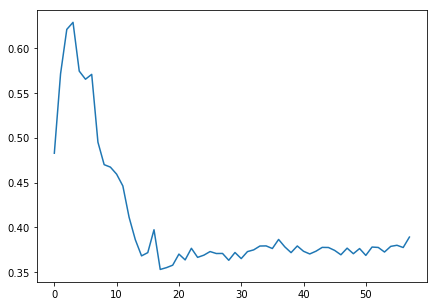

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

blobs, classes = make_blobs(500, centers=10)

silhouette_avgs = []
for k in range(2, 60):
     kmean = KMeans(n_clusters=k).fit(blobs)
     silhouette_avgs.append(metrics.silhouette_score(blobs, kmean.labels_))

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(silhouette_avgs)

In [56]:
from sklearn import datasets
from sklearn import cluster

blobs, ground_truth = datasets.make_blobs(1000, centers=3,cluster_std=1.75)

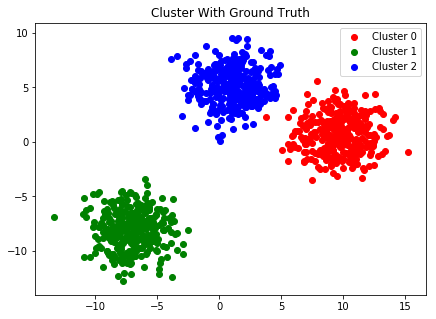

In [57]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
     p = blobs[ground_truth == i]
     ax.scatter(p[:,0], p[:,1], c=colors[i],
     label="Cluster {}".format(i))
ax.set_title("Cluster With Ground Truth")
ax.legend()

In [58]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blobs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
kmeans.cluster_centers_

array([[ 1.01148045,  5.17981017],
       [-7.10484614, -8.05827937],
       [ 9.67035853,  0.70478871]])

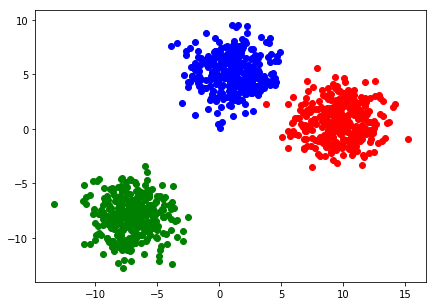

In [60]:
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3): 
     p = blobs[ground_truth == i]
     ax.scatter(p[:,0], p[:,1], c=colors[i], label="Cluster {}".format(i))

In [61]:
for i in range(3):
     print((kmeans.labels_ == ground_truth)[ground_truth == i].astype(int).mean())

0.00299401197605
1.0
0.0


In [63]:
new_ground_truth = ground_truth.copy()
new_ground_truth[ground_truth == 1] = 2
new_ground_truth[ground_truth == 2] = 1

In [64]:
from sklearn import metrics
metrics.normalized_mutual_info_score(ground_truth, kmeans.labels_)

0.99380159064547557

In [65]:
metrics.normalized_mutual_info_score(ground_truth, ground_truth)

1.0

In [66]:
metrics.mutual_info_score(ground_truth, kmeans.labels_)

1.0918016465102136

In [67]:
kmeans.inertia_

5746.5970770355179

#### Handling data and quantizing an image 

In [68]:
import numpy as np
from sklearn.datasets import make_blobs
blobs, labels = make_blobs(int(1e6), 3)

from sklearn.cluster import KMeans, MiniBatchKMeans
kmeans = KMeans(n_clusters=3)
minibatch = MiniBatchKMeans(n_clusters=3)

In [69]:
%time kmeans.fit(blobs)

Wall time: 9.79 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
%time minibatch.fit(blobs)

Wall time: 1.32 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [71]:
kmeans.cluster_centers_

array([[-9.85194496,  0.38599354, -6.44716682],
       [ 4.3976385 ,  2.00713764,  2.80129732],
       [-8.44214148,  1.41020919, -5.20445013]])

In [72]:
minibatch.cluster_centers_

array([[-8.58628738,  1.37350478, -5.18127385],
       [ 4.39009139,  1.96399083,  2.75866286],
       [-9.7421717 ,  0.29919456, -6.64099141]])

In [73]:
from sklearn.metrics import pairwise
pairwise.pairwise_distances(kmeans.cluster_centers_[0].reshape(1, -1), minibatch.cluster_centers_[0].reshape(1, -1))

array([[ 2.0443954]])

In [74]:
np.diag(pairwise.pairwise_distances(kmeans.cluster_centers_, minibatch.cluster_centers_))

array([ 2.0443954 ,  0.06112531,  2.23340166])

In [75]:
minibatch = MiniBatchKMeans(batch_size=len(blobs))
%time minibatch.fit(blobs)

Wall time: 34.9 s


MiniBatchKMeans(batch_size=1000000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

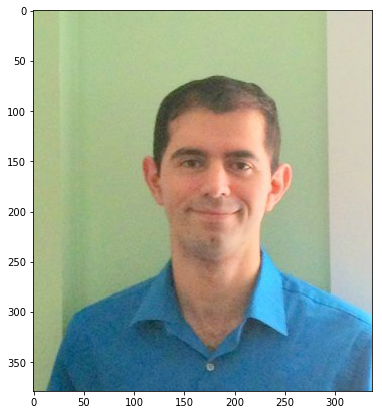

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
img = ndimage.imread("headshot.jpg")
plt.figure(figsize = (10,7))
plt.imshow(img)

In [79]:
img.shape

(379, 337, 3)

In [80]:
x, y, z = img.shape
long_img = img.reshape(x*y, z)
long_img.shape

(127723, 3)

In [81]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(long_img)
centers = k_means.cluster_centers_
centers

array([[ 169.68744417,  189.63551696,  143.75482217],
       [  45.79476762,   94.58038305,  120.03576053],
       [ 218.74722175,  202.13922265,  184.12461217],
       [ 169.01222166,  123.08237067,   99.60751158],
       [  67.53651929,  151.55808409,  201.99534027]])

In [82]:
labels = k_means.labels_
labels

array([0, 0, 0, ..., 4, 4, 4])

plt.figure(figsize = (10,7))
plt.imshow(centers[labels].reshape(x, y, z))

#### Finding the closest object in the feature space

In [1]:
import numpy as np
from sklearn.metrics import pairwise
from sklearn.datasets import make_blobs
points, labels = make_blobs()

In [2]:
distances = pairwise.pairwise_distances(points)

In [3]:
np.diag(distances) [:5]
distances[0][:5]

array([  0.        ,   0.41055104,  16.05734431,   5.82547327,  14.99144343])

In [4]:
ranks = np.argsort(distances[0])
ranks[:5]

array([ 0, 32,  1, 21, 68], dtype=int64)

In [5]:
points[ranks][:5]

array([[-2.9612554 ,  8.23979151],
       [-3.28483981,  8.31783293],
       [-3.20115222,  7.90662237],
       [-2.60451209,  8.80895866],
       [-3.88318646,  8.20185192]])

In [6]:
sp_points = points[ranks][:5]

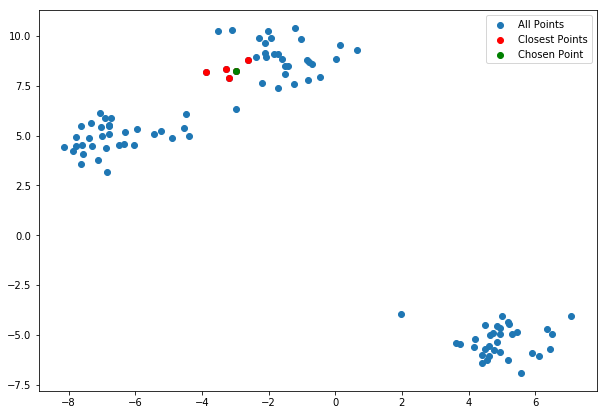

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
plt.scatter(points[:,0], points[:,1], label = 'All Points')
plt.scatter(sp_points[:,0],sp_points[:,1],color='red',
label='Closest Points')
plt.scatter(points[0,0],points[0,1],color='green', label = 'Chosen Point')
plt.legend()

In [9]:
def euclid_distances(x, y):
    return np.power(np.power(x - y, 2).sum(), .5)
euclid_distances(points[0], points[1])

0.41055104280978844

In [11]:
pairwise.pairwise_distances([[0, 0], [5, 5]], metric='cityblock')

array([[  0.,  10.],
       [ 10.,   0.]])

In [12]:
X = np.random.binomial(1, .5, size=(2, 4)).astype(np.bool)
X

array([[ True,  True, False, False],
       [False, False,  True,  True]], dtype=bool)

In [13]:
pairwise.pairwise_distances(X, metric='hamming')

array([[ 0.,  1.],
       [ 1.,  0.]])

#### Probabilistic clustering with Gaussian mixture models

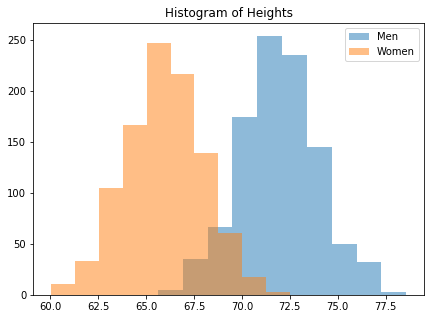

In [1]:
import numpy as np
N = 1000
in_m = 72
in_w = 66
s_m = 2
s_w = s_m
m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)
from matplotlib import pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Histogram of Heights")
ax.hist(m, alpha=.5, label="Men");
ax.hist(w, alpha=.5, label="Women");
ax.legend()

In [2]:
random_sample = np.random.choice([True, False], size=m.size)
m_test = m[random_sample]
m_train = m[~random_sample]
w_test = w[random_sample]
w_train = w[~random_sample]

In [3]:
from scipy import stats
m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())

In [4]:
m_pdf.pdf(m[0])

0.10353470438605442

In [5]:
w_pdf.pdf(m[0])

3.846817337678853e-05

In [6]:
guesses_m = np.ones_like(m_test)
guesses_m[m_pdf.pdf(m_test) < w_pdf.pdf(m_test)] = 0

In [7]:
guesses_m.mean()

0.92490118577075098

In [8]:
guesses_w = np.ones_like(w_test)
guesses_w[m_pdf.pdf(w_test) > w_pdf.pdf(w_test)] = 0
guesses_w.mean()

0.94071146245059289

In [9]:
s_m = 1
s_w = 4
m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)

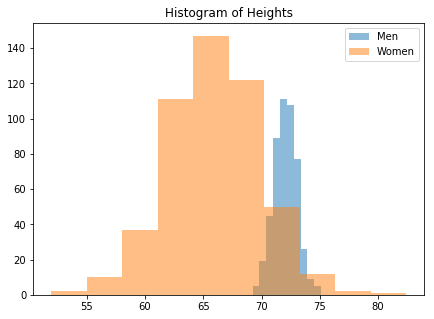

In [10]:
m_test = m[random_sample]
m_train = m[~random_sample]
w_test = w[random_sample]
w_train = w[~random_sample]
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Histogram of Heights")
ax.hist(m_train, alpha=.5, label="Men");
ax.hist(w_train, alpha=.5, label="Women");
ax.legend()

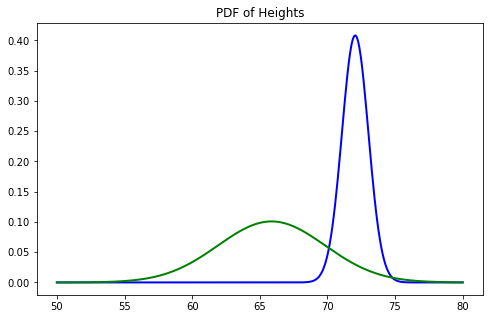

In [11]:
m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())

x = np.linspace(50,80,300)
plt.figure(figsize=(8,5))
plt.title('PDF of Heights')
plt.plot(x, m_pdf.pdf(x), 'k', linewidth=2, color='blue', label='Men')
plt.plot(x, w_pdf.pdf(x), 'k', linewidth=2, color='green',label='Women')

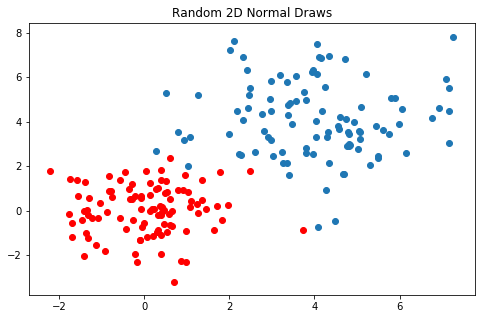

In [12]:
class_A = np.random.normal(0, 1, size=(100, 2))
class_B = np.random.normal(4, 1.5, size=(100, 2))
f, ax = plt.subplots(figsize=(8, 5))
plt.title('Random 2D Normal Draws')
ax.scatter(class_A[:,0], class_A[:,1], label='A', c='r')
ax.scatter(class_B[:,0], class_B[:,1], label='B')

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
X = np.row_stack((class_A, class_B))
y = np.hstack((np.ones(100), np.zeros(100)))

train = np.random.choice([True, False], 200)
gmm.fit(X[train])


In [14]:
gmm.predict(X[train])[:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Using k-means for outlier detection 

In [16]:
from sklearn.datasets import make_blobs
X, labels = make_blobs(100, centers=1)
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

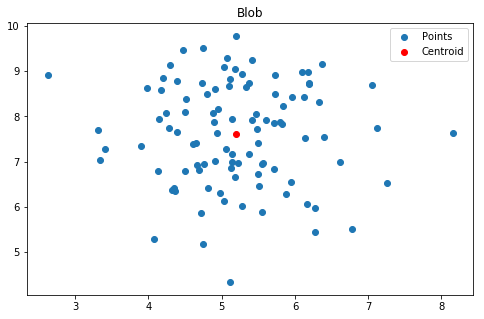

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Blob")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], label='Centroid',color='r')
ax.legend()

In [18]:
distances = kmeans.transform(X)

In [19]:
sorted_idx = np.argsort(distances.ravel())[::-1][:5] 

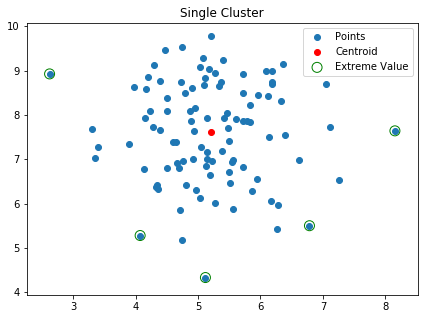

In [20]:
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],label='Extreme Value', edgecolors='g',facecolors='none', s=100)
ax.legend(loc='best')

In [21]:
new_X = np.delete(X, sorted_idx, axis=0)

In [22]:
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

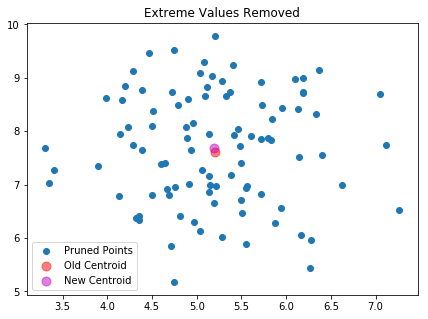

In [23]:
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Extreme Values Removed")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], label='Old Centroid',color='r',s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:, 0],new_kmeans.cluster_centers_[:, 1], label='New Centroid',color='m', s=80, alpha=.5)
ax.legend(loc='best')

In [24]:
from scipy import stats
emp_dist = stats.multivariate_normal(kmeans.cluster_centers_.ravel())
lowest_prob_idx = np.argsort(emp_dist.pdf(X))[:5]
np.all(X[sorted_idx] == X[lowest_prob_idx])    

True

### Using KNN for regression 

In [25]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
X = iris.data[:,:2]
y = iris.data[:,2]

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
print("The MSE is: {:.2}".format(np.power(y - lr.predict(X),2).mean()))

The MSE is: 0.41


In [28]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X, y)
print("The MSE is: {:.2}".format(np.power(y - knnr.predict(X),2).mean()))

The MSE is: 0.17


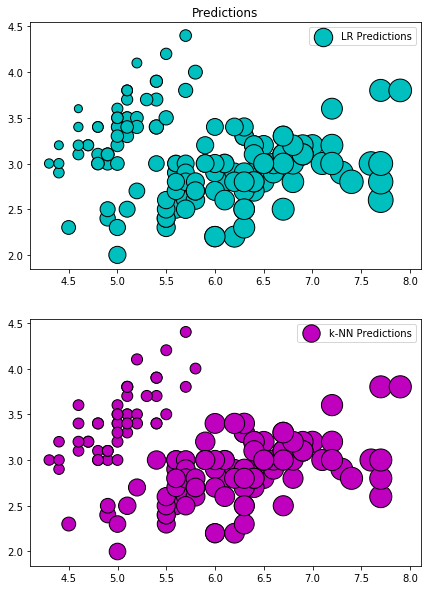

In [29]:
f, ax = plt.subplots(nrows=2, figsize=(7, 10))
ax[0].set_title("Predictions")
ax[0].scatter(X[:, 0], X[:, 1], s=lr.predict(X)*80, label='LR Predictions', color='c', edgecolors='black')
ax[1].scatter(X[:, 0], X[:, 1], s=knnr.predict(X)*80, label='k-NN Predictions', color='m', edgecolors='black')
ax[0].legend()
ax[1].legend()

In [30]:
setosa_idx = np.where(iris.target_names=='setosa')
setosa_mask = iris.target == setosa_idx[0]
y[setosa_mask][:5]

array([ 1.4,  1.4,  1.3,  1.5,  1.4])

In [31]:
knnr.predict(X)[setosa_mask][:5]

array([ 1.46,  1.47,  1.51,  1.42,  1.48])

In [32]:
lr.predict(X)[setosa_mask][:5]

array([ 1.83762646,  2.1510849 ,  1.52707371,  1.48291658,  1.52562087])

In [33]:
example_point = X[0]

In [34]:
from sklearn.metrics import pairwise
distances_to_example = pairwise.pairwise_distances(X)[0]
ten_closest_points = X[np.argsort(distances_to_example)][:10]
ten_closest_y = y[np.argsort(distances_to_example)][:10]
ten_closest_y.mean() 

1.46